In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
\
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.0,0.0,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.669722,0.170423,0.904901,0.198069,0.741857,1.432202,0.271532,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.0,0.0,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,0.768122,0.063333,1.014705,0.353106,0.768454,1.306729,0.098188,1.605018,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.0,0.0,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.586299,0.113542,0.897872,0.263493,0.544247,1.750091,0.313578,2.351887,1.113744,1.805748


In [5]:
df_products.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_mean', 'unit_liquid_cost_perc_std',
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_mean',
       'unit_markup_std', 'unit_markup_max', 'unit_markup_min',
       'unit_markup_percentile_50'],
      dtype='object', length=237)

## Using Elbow optimization with KMeans

In [6]:
df_products.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_mean', 'unit_liquid_cost_perc_std',
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_mean',
       'unit_markup_std', 'unit_markup_max', 'unit_markup_min',
       'unit_markup_percentile_50'],
      dtype='object', length=237)

In [7]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 48.25446182254221
error = 48.25446182254221
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 39.8397995814746
error = 8.41466224106761
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 35.628620569700104
error = 4.211179011774497
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 32.3683389427236
error = 3.260281626976507
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 29.993672650858713
error = 2.3746662918648838
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 27.389166525351158
error = 2.6045061255075552
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 25.852395967180257
error = 1.5367705581709004
###############################
Number of Clusters: 16
Starting K-means++
Finished


Finished
J = 0.08954019739653013
error = 0.07133516039614846
###############################
Number of Clusters: 128
Starting K-means++
Finished
J = 0.037621807332954116
error = 0.051918390063576014
###############################
Number of Clusters: 130
Starting K-means++
Finished
J = 0.0
error = 0.037621807332954116
###############################

Best k: 130
Number of iterations: 66
Error threshold  True


J  [48.25446182254221, 39.8397995814746, 35.628620569700104, 32.3683389427236, 29.993672650858713, 27.389166525351158, 25.852395967180257, 24.10416956580461, 22.99791900924254, 21.729894173167736, 20.63429834874666, 19.35998135479185, 18.47551936112761, 17.789498528658722, 16.938879626078165, 15.86081477938196, 15.23273468119155, 14.614414995441708, 13.83019911291591, 13.171911434708957, 12.399712072897646, 11.802892542862608, 11.144834922582962, 10.633840876794636, 10.240387324535861, 9.617874886402799, 9.087412224999424, 8.655361173865506, 8.133348266522717, 7.431588746161819, 7.10247763692783, 6.874455506665903, 6.358092747332584, 5.972897025177272, 5.6644094450648845, 5.2765620620519815, 4.919026756068424, 4.6425808993259485, 4.3554069450649955, 4.014933381551704, 3.731942722091962, 3.491346540515329, 3.2261584880610448, 3.0216881684725365, 2.817034681394819, 2.601411423814414, 2.4143656736347143, 2.1835061247802092, 1.947711321575637, 1.7878944236172714, 1.6235974297932276, 1.4103

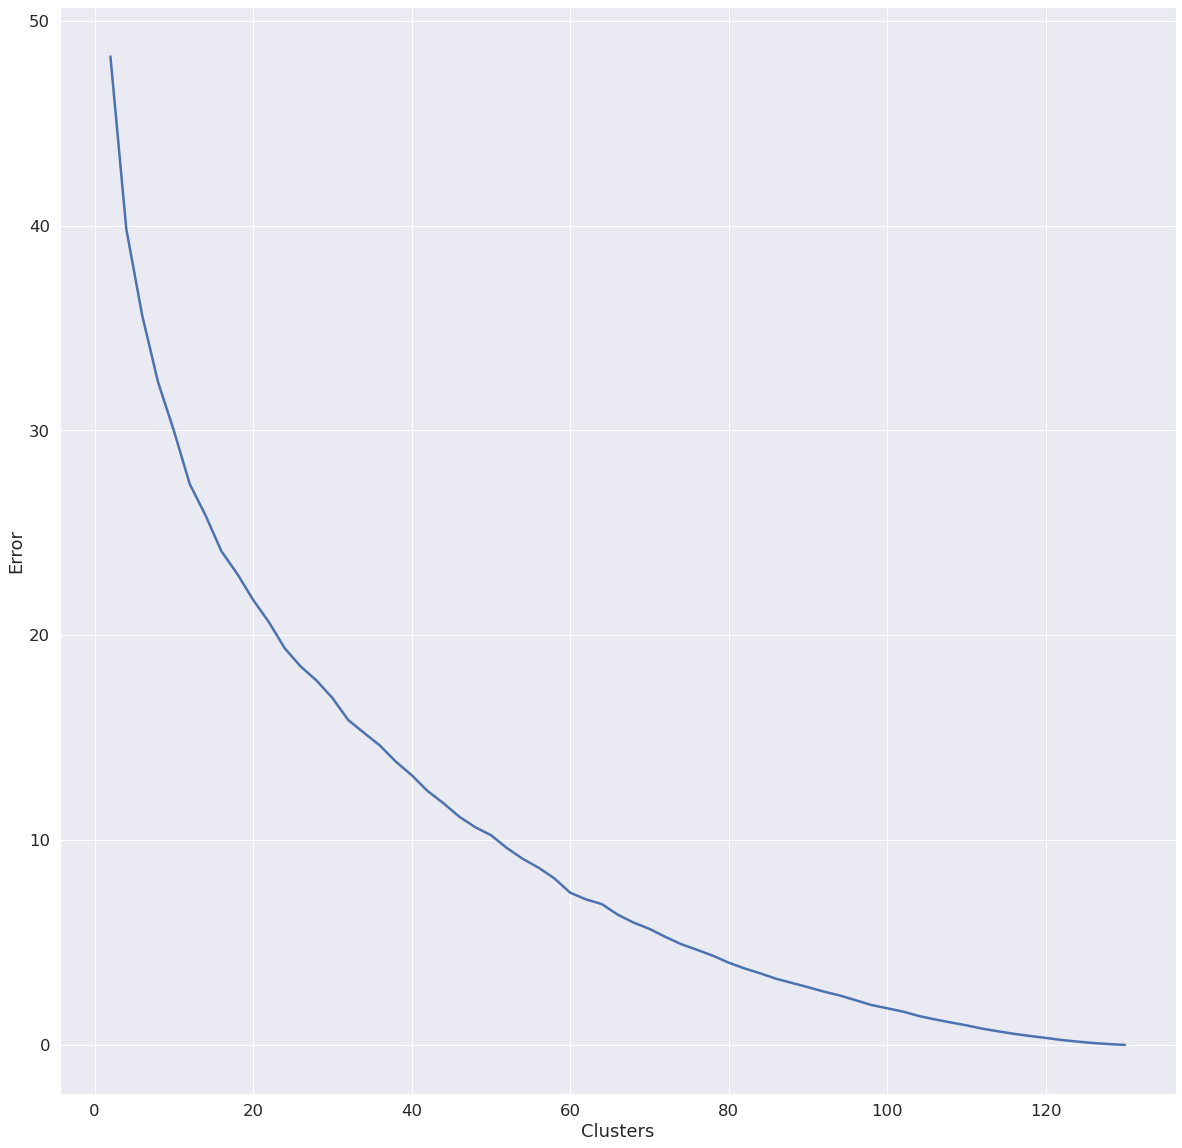

In [8]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

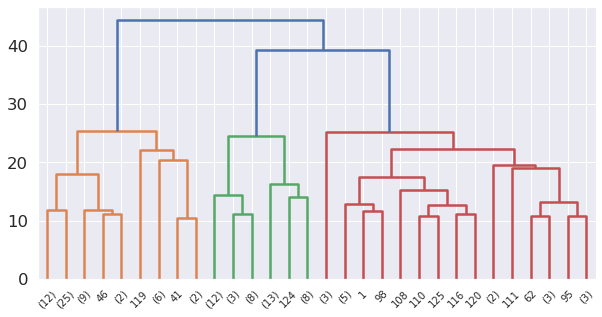

In [9]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products)

In [10]:
clusters = _optimizer.fcluster_cut(df_products.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 130)